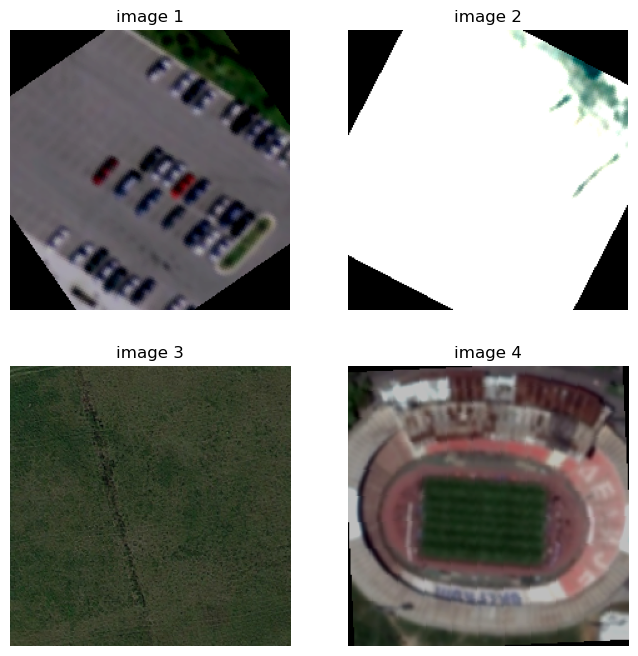

image 1 caption: many the cars are in a parking lots spot on some grass farm waste fields.
image 2 caption: some big green desert areas are concentrated near a thick mountainous section of surrounding desert.
image 3 caption: it is a vital remnant of your ancient mother earth.
image 4 caption: the other original house is often seen by many houses visitors regularly.


In [6]:
from dataset.rsicd import RSICD
import torch
import matplotlib.pyplot as plt

dataset = RSICD("./dataset_rsicd.json", "./RSICD_images")
figure = plt.figure(figsize=(8, 8))
captions = []

for i in range(1, 5): 
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    sample = dataset[sample_idx]
    figure.add_subplot(2, 2, i)
    captions.append(sample["caption"])
    plt.title(f"image {i}")
    plt.axis("off")
    plt.imshow(sample["image"].permute(1, 2, 0))
plt.show()

for i in range(len(captions)):
    print(f"image {i + 1} caption: {captions[i]}")


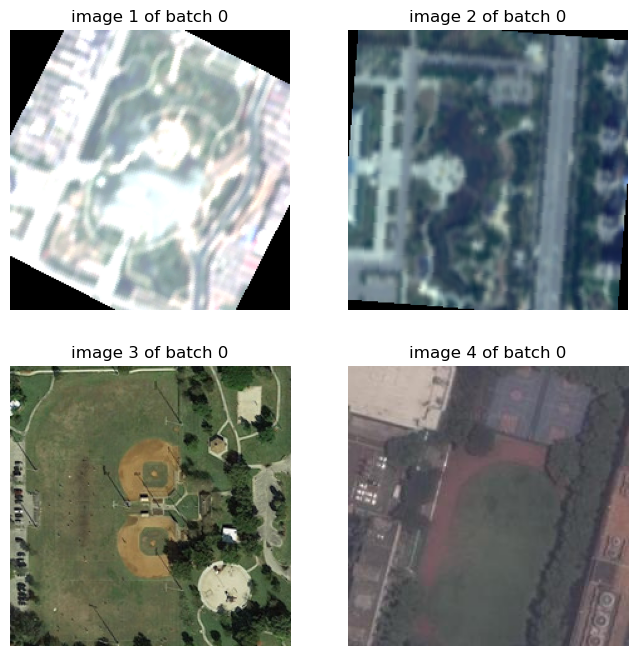

image 1 caption of batch 0: many buildings are around a building over a narrow lagoon with many canoe meeting ground spots and a rain bank.
image 2 caption of batch 0: the existing blind and traditional child supported playground are on the side of the new property.
image 3 caption of batch 0: two summer baseball facilities are in some of mature deciduous trees.
image 4 caption of batch 0: the dense tropical plants around the military fort encompass a large wide extent of football bed area.


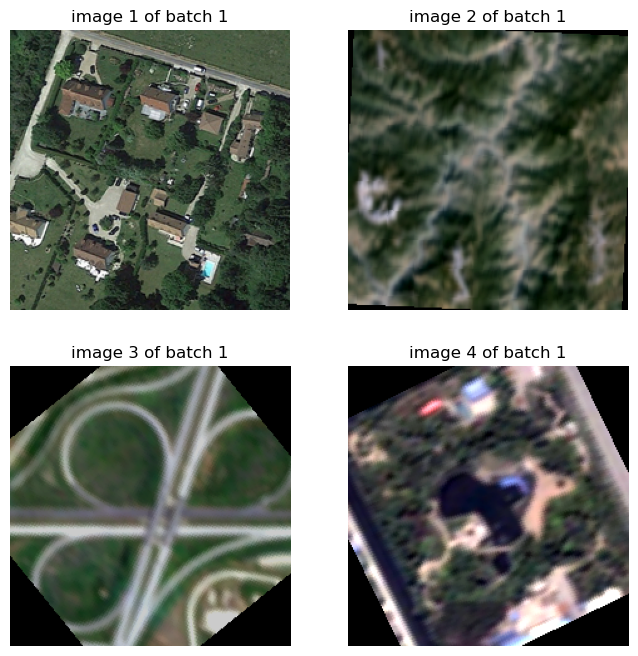

image 1 caption of batch 1: some buildings and a green vegetable areas are in a very very dense green character.
image 2 caption of batch 1: it is a small group of ancient eroded volcanic island mountains.
image 3 caption of batch 1: many southern american township townships are near a deep wadi.
image 4 caption of batch 1: many lush rain forests and a big lake are in a larger complex of a library and several governmental buildings.


In [7]:
from torch.utils.data import DataLoader 

dataloader = DataLoader(dataset, batch_size=4, shuffle=True) 

for i, batch in enumerate(dataloader): 
    captions = []
    figure = plt.figure(figsize=(8, 8))
    for j in range(1, 5): 
        image = batch["image"][j - 1]
        captions.append(batch["caption"][j - 1])
        figure.add_subplot(2, 2, j)
        plt.title(f"image {j} of batch {i}")
        plt.axis("off")
        plt.imshow(image.permute(1, 2, 0))
    plt.show()

    for k in range(len(captions)):
        print(f"image {k + 1} caption of batch {i}: {captions[k]}")
    
    if i == 1:
        break

In [8]:
import time  
from dataset.rsicd import RSICD 

start_time = time.time() 
dataset_without_bert = RSICD("./dataset_rsicd.json", "./RSICD_images", bert_text_augmentation=False)
dataset_without_bert[0]
end_time = time.time() 

print(f"Execution time without BERT text augmentation: {end_time - start_time}")

Execution time without BERT text augmentation: 0.12091493606567383


In [9]:
import time  
from dataset.rsicd import RSICD 

start_time = time.time() 
dataset_with_bert = RSICD("./dataset_rsicd.json", "./RSICD_images")
dataset_with_bert[0]
end_time = time.time() 

print(f"Execution time with BERT text augmentation: {end_time - start_time}")

Execution time with BERT text augmentation: 1.6262400150299072
